# Visualisation of results

TODO:
-  calculate trampoline density (both in the grid inteprolation if it matters, and within each image)

In [407]:
import pandas as pd
import pygmt
import matplotlib.pyplot as plt
from pathlib import Path

PROJECTION = "U33R/12c"
SPACING = 0.002

REGION_OSLO = [10.4, 
        11.2,
        59.85,
        60]

## The training and validation sets

In [408]:
# load image coordinates
folder_path = Path('./images/data_3-2022-01-22/')

df = pd.read_csv(folder_path / 'images.txt',  names=["number", "lat", "long", "zoom"])
df.head()

,number,lat,long,zoom
0,0,59.898876,10.550180,19
1,1,59.898876,10.553181,19
2,2,59.898876,10.556181,19
3,3,59.898876,10.559180,19
4,4,59.898876,10.562181,19


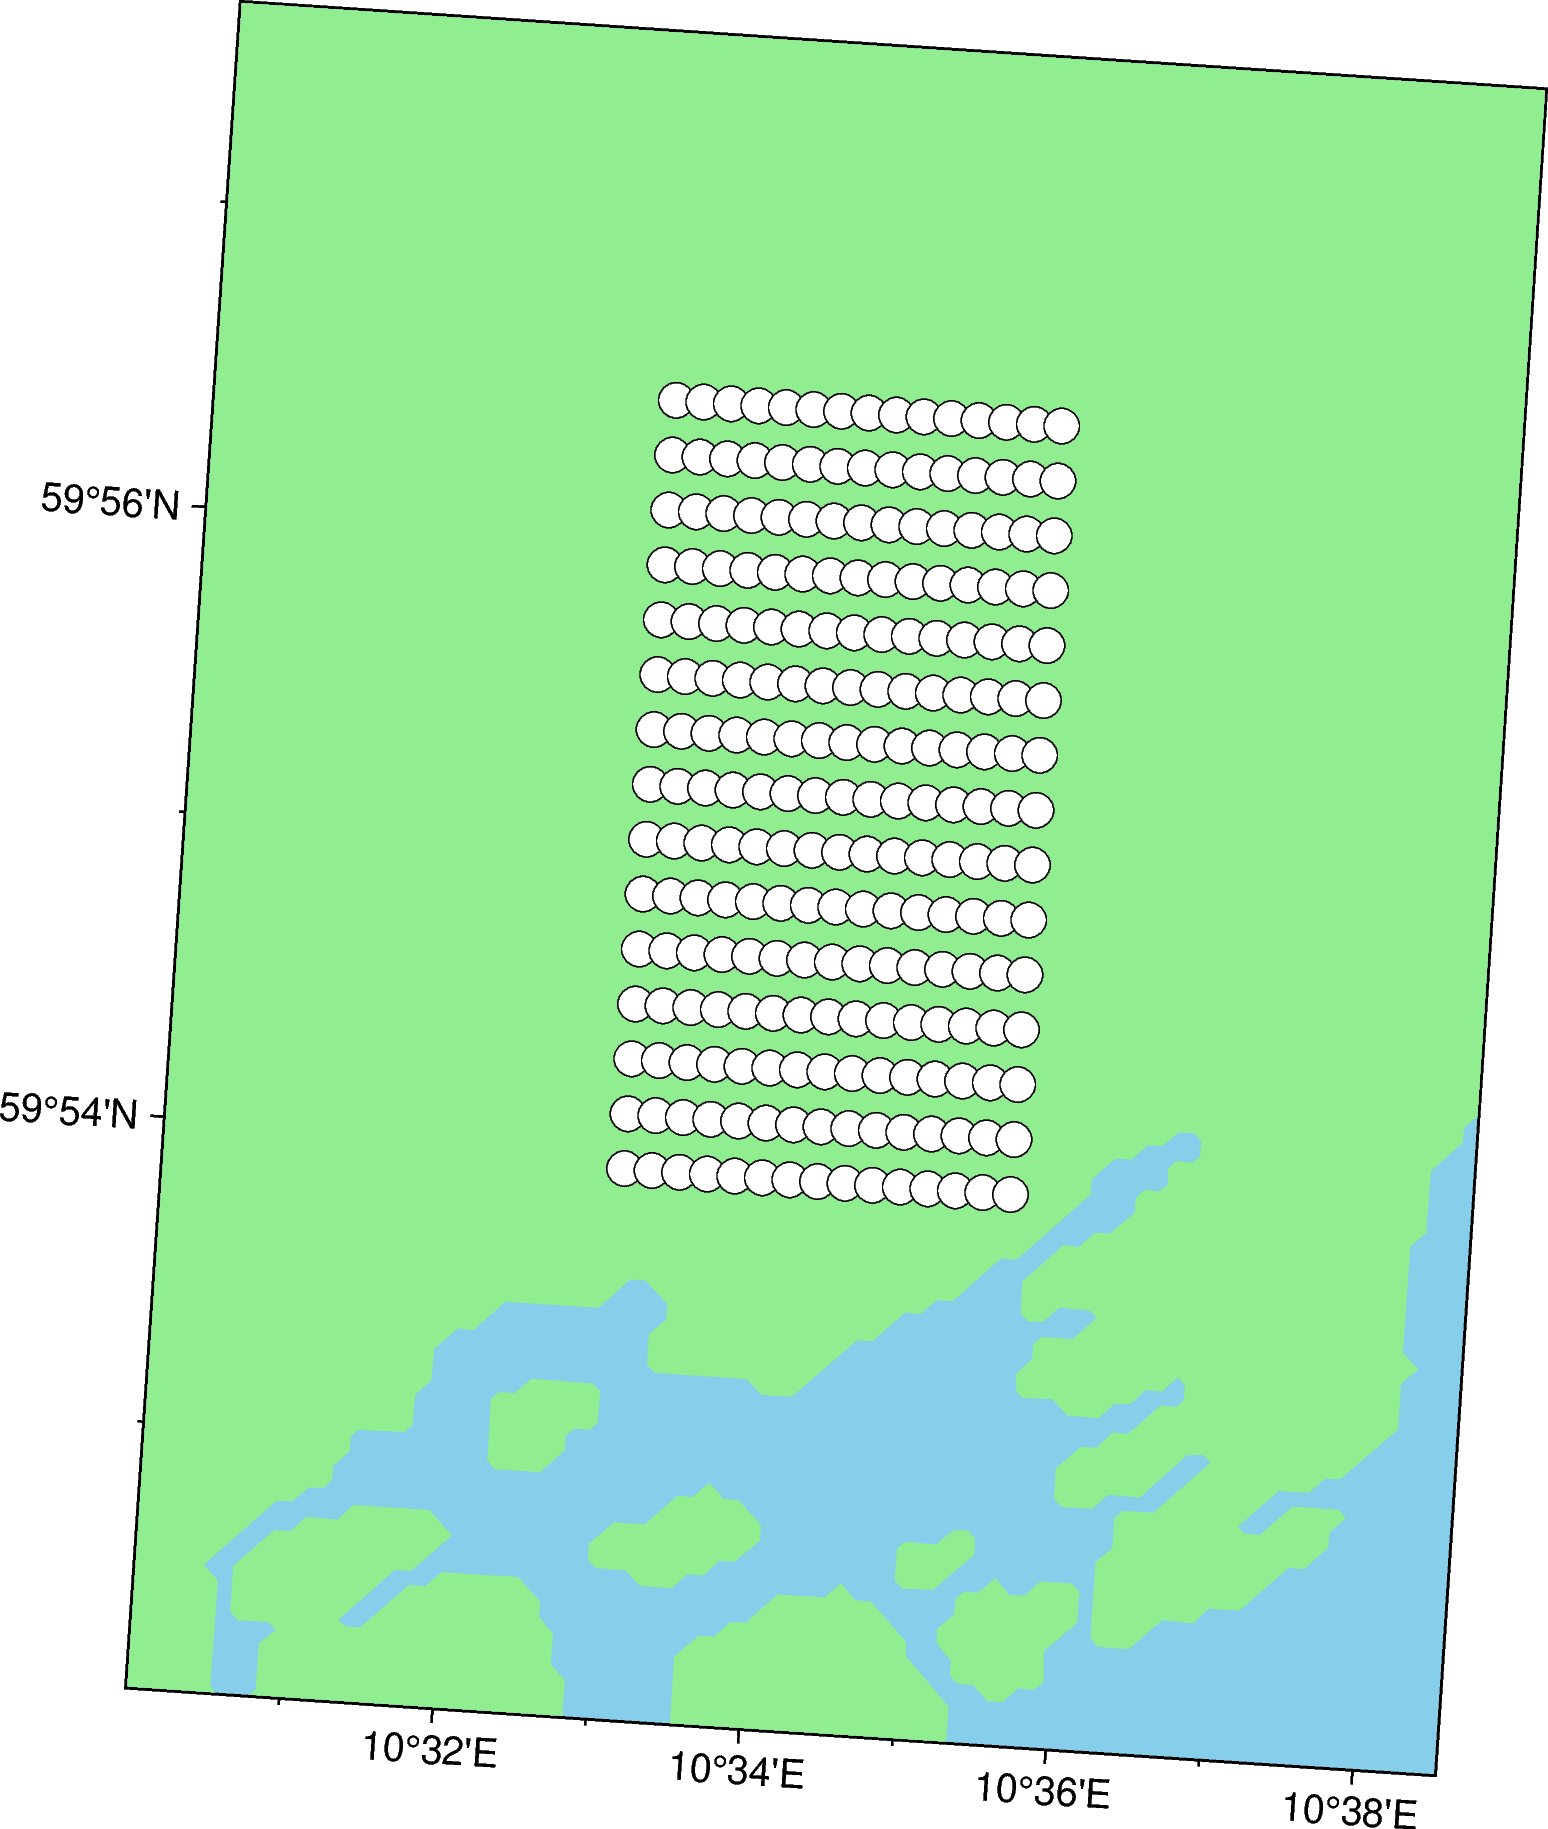

In [409]:
import pygmt

region = [
    df.long.min() - 0.05,
    df.long.max() + 0.05,
    df.lat.min() - 0.03,
    df.lat.max() + 0.02,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/location_map_training_validation.png', dpi=400)

In [410]:
# read label data

# Load
import os
from pathlib import Path
import numpy as np

text_files = [f for f in os.listdir(folder_path) if f.endswith('gmaps.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(folder_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())
print(f"Data for {df.Filepath.nunique()} images containing a trampoline")

['100_gmaps.txt', '104_gmaps.txt', '105_gmaps.txt', '106_gmaps.txt', '107_gmaps.txt']
  Number         X         Y     Width    Height       Filepath
0      0  0.726562      0.85    0.0375   0.03125  100_gmaps.txt
0      0  0.342187  0.577344   0.04375  0.045312  104_gmaps.txt
1      0  0.807031  0.421875  0.057813    0.0625  104_gmaps.txt
2      0  0.809375  0.032031      0.05  0.048438  104_gmaps.txt
3      0  0.251563  0.794531  0.046875  0.051562  104_gmaps.txt
Data for 110 images containing a trampoline


In [411]:
# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = folder_path / "images.txt"

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"

print(f"Coordinates data for {len(df_coords)} images")

# get number of trampolines (number of times filepath appears in df)
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'count']

# merge coordinate and trampoline number dataframes
df = pd.merge(df_coords, df_counts, on='Filepath', how='outer').fillna(0)
print(f"Trampoline counts data for {len(df)} images")
df.head()

Coordinates data for 225 images
Trampoline counts data for 225 images


,number,lat,long,zoom,Filepath,count
0,0,59.898876,10.550180,19,0_gmaps.txt,0.0
1,1,59.898876,10.553181,19,1_gmaps.txt,3.0
2,2,59.898876,10.556181,19,2_gmaps.txt,0.0
3,3,59.898876,10.559180,19,3_gmaps.txt,2.0
4,4,59.898876,10.562181,19,4_gmaps.txt,0.0


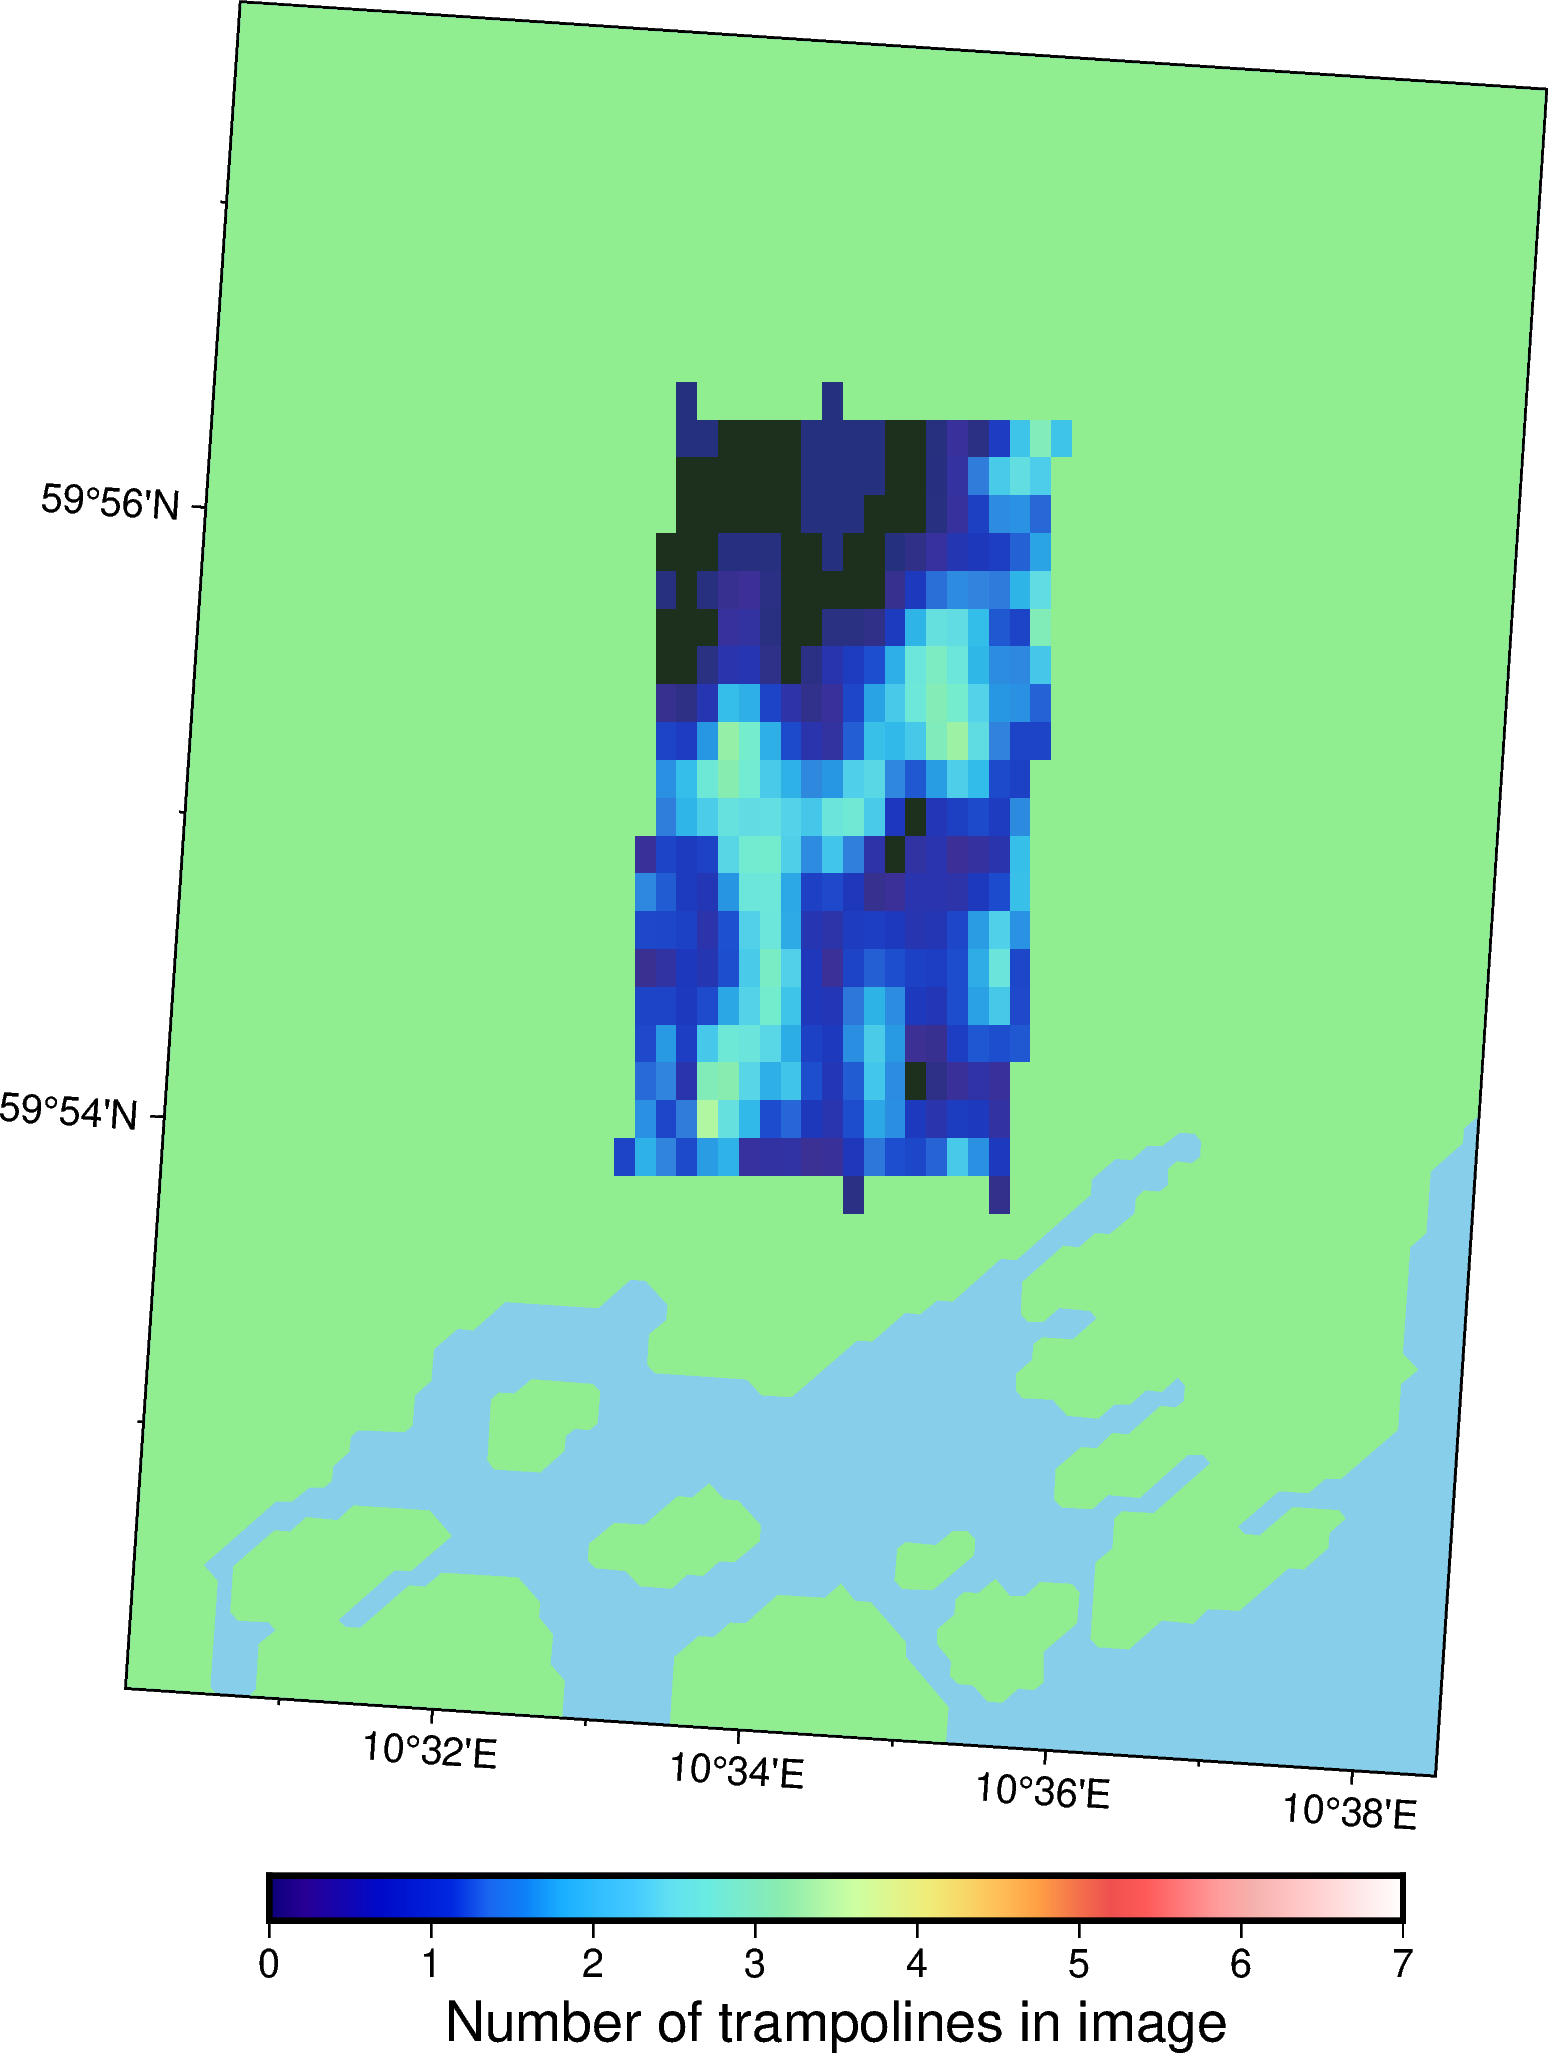

<Figure size 432x288 with 0 Axes>

In [412]:
#pygmt.sph2grd(data=df[['lat', 'long']])
local_region = [df['long'].min(), df['long'].max(), df['lat'].min(), df['lat'].max()]

trampoline_surface = pygmt.surface(data=df[['long', 'lat', 'count']], region=local_region, spacing=SPACING)

fig = pygmt.Figure()
fig.basemap(region=region, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
pygmt.makecpt(cmap="haxby", series=[0, df['count'].max()])
fig.grdimage(trampoline_surface, nan_transparent=True, transparency=20)
fig.colorbar(frame=["a1f1", 'x+l"Number of trampolines in image"', "y"])
#fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
plt.tight_layout()
fig.show()
fig.savefig('./figures/trampoline_map_training_validation.png', dpi=400)

The above fits with the area - residential areas have the most trampolines

<img src="./resources/training_set_satellite.png" alt="Satellite images over training set" style="width: 300px;"/>

## The test set - across Oslo

### East of Oslo

In [413]:
# load image coordinates
folder_path = Path('./images/data_2022-02-13_Oslo_E')
df = pd.read_csv(folder_path / 'images.txt',  names=["number", "lat", "long", "zoom"])
print(len(df))
df.head()

print(df.lat.max())
print(df.lat.min())
print(df.long.max())
print(df.long.min())


18096
59.968406677246094
59.880001068115234
11.09697437286377
10.800000190734863


[10.700000190734864, 11.107974372863769, 59.83000106811524, 59.97840667724609]
   number        lat       long  zoom
0       0  59.880001  10.800000    19
1       1  59.880001  10.801717    19
2       2  59.880001  10.803433    19
3       3  59.880001  10.805150    19
4       4  59.880001  10.806867    19


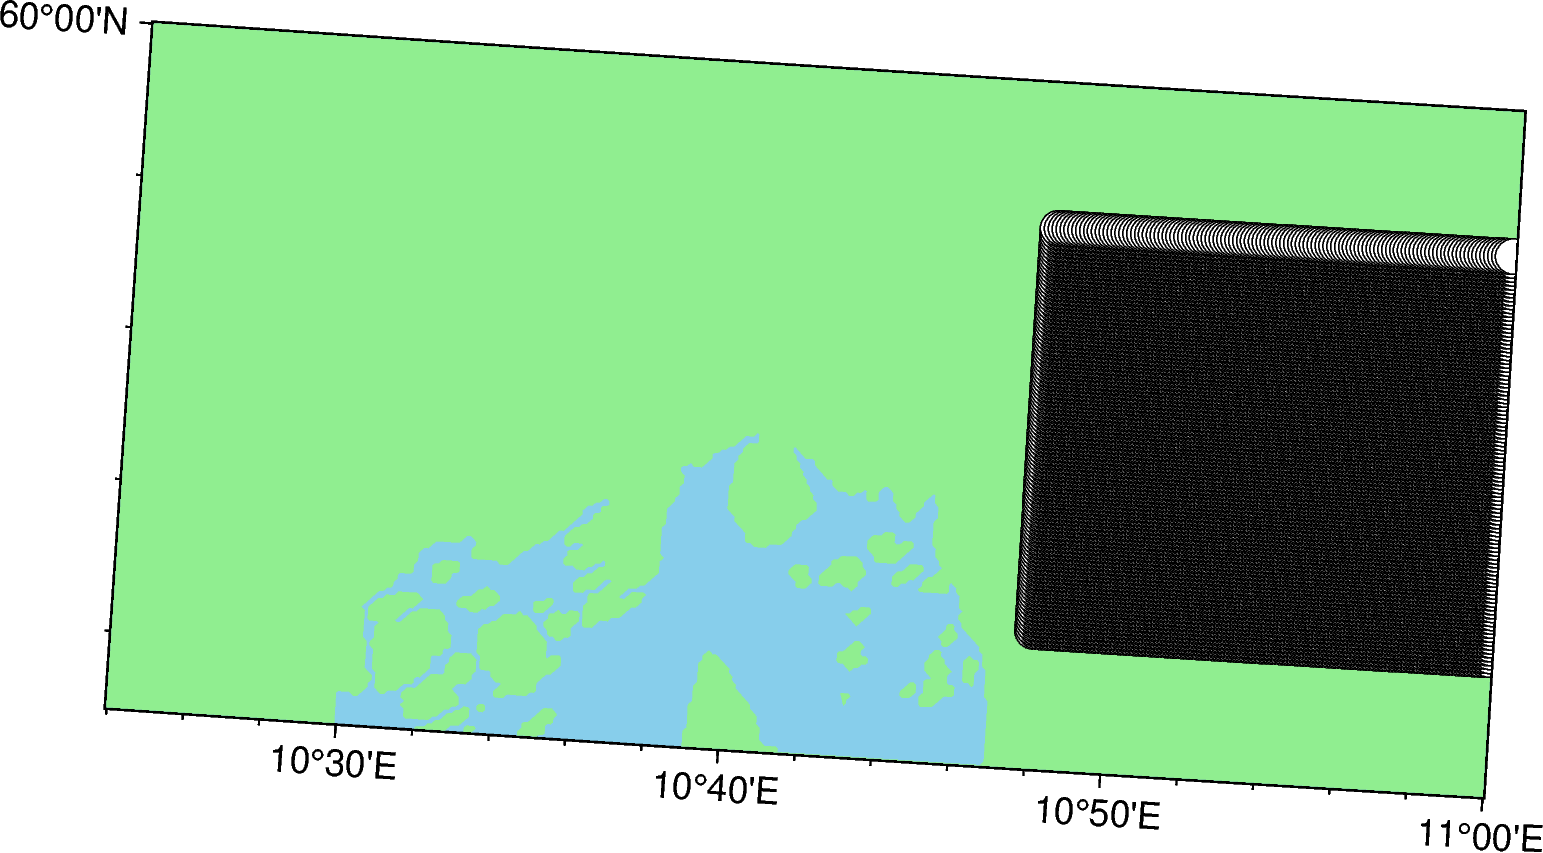

In [414]:
import pygmt

region = [
    df.long.min() - 0.1,
    df.long.max() + 0.011,
    df.lat.min() - 0.05,
    df.lat.max() + 0.01,
]

print(region)
print(df.head())

fig = pygmt.Figure()
fig.basemap(region=REGION_OSLO, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png', dpi=400)

In [415]:
# Load
import os
from pathlib import Path
import numpy as np

labels_path = Path(r"C:\Users\lug\Documents\Code\trampolines\yolov5\runs\detect\exp9\labels")

text_files = [f for f in os.listdir(labels_path) if f.endswith('gmaps.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(labels_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())
print(f"Data for {df.Filepath.nunique()} images containing a trampoline")

# get number of trampolines (number of times filepath appears in df)
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'trampoline count']

['0_gmaps.txt', '10008_gmaps.txt', '10030_gmaps.txt', '10031_gmaps.txt', '10032_gmaps.txt']
  Number         X         Y     Width    Height         Filepath
0      0  0.301562  0.540625  0.046875      0.05      0_gmaps.txt
1      0  0.634375  0.408594  0.040625  0.039062      0_gmaps.txt
0      0  0.021875  0.014844   0.04375  0.029687  10008_gmaps.txt
0      0     0.125  0.271094      0.05  0.048438  10030_gmaps.txt
1      0  0.208594  0.014063  0.045312  0.028125  10030_gmaps.txt
Data for 3652 images containing a trampoline


In [416]:
# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = folder_path / "images.txt"

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"

print(f"Coordinates data for {len(df_coords)} images")

# merge coordinate and trampoline number dataframes
df = pd.merge(df_coords, df_counts, on='Filepath', how='outer').fillna(0)

# calculate number of trampolines per m2 (see coordinates_calculation.ipynb for calculation of image size in m)
m_per_image_zoom_19 = 187.77
m2_per_image_zoom_19 = m_per_image_zoom_19**2
km2_per_image_zoom_19 = m2_per_image_zoom_19 / 1e6
df['trampolines per km2'] = df['trampoline count'] / km2_per_image_zoom_19

print(f"Maximum number of trampolines per km2 = {df['trampolines per km2'].max()}")

# save to csv
df.to_csv('./output/Oslo_E.csv')

print(f"Trampoline counts data for {len(df)} images")

df.head(10)

Coordinates data for 18096 images
Maximum number of trampolines per km2 = 283.6270105251629
Trampoline counts data for 18096 images


,number,lat,long,zoom,Filepath,trampoline count,trampolines per km2
0,0,59.880001,10.800000,19,0_gmaps.txt,2.0,56.725402
1,1,59.880001,10.801717,19,1_gmaps.txt,3.0,85.088103
2,2,59.880001,10.803433,19,2_gmaps.txt,2.0,56.725402
3,3,59.880001,10.805150,19,3_gmaps.txt,2.0,56.725402
4,4,59.880001,10.806867,19,4_gmaps.txt,2.0,56.725402
5,5,59.880001,10.808583,19,5_gmaps.txt,3.0,85.088103
6,6,59.880001,10.810300,19,6_gmaps.txt,6.0,170.176206
7,7,59.880001,10.812016,19,7_gmaps.txt,0.0,0.000000
8,8,59.880001,10.813733,19,8_gmaps.txt,0.0,0.000000
9,9,59.880001,10.815450,19,9_gmaps.txt,0.0,0.000000


surface [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
surface (gmtapi_init_grdheader): Please select compatible -R and -I values
surface [WARNING]: 11391 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


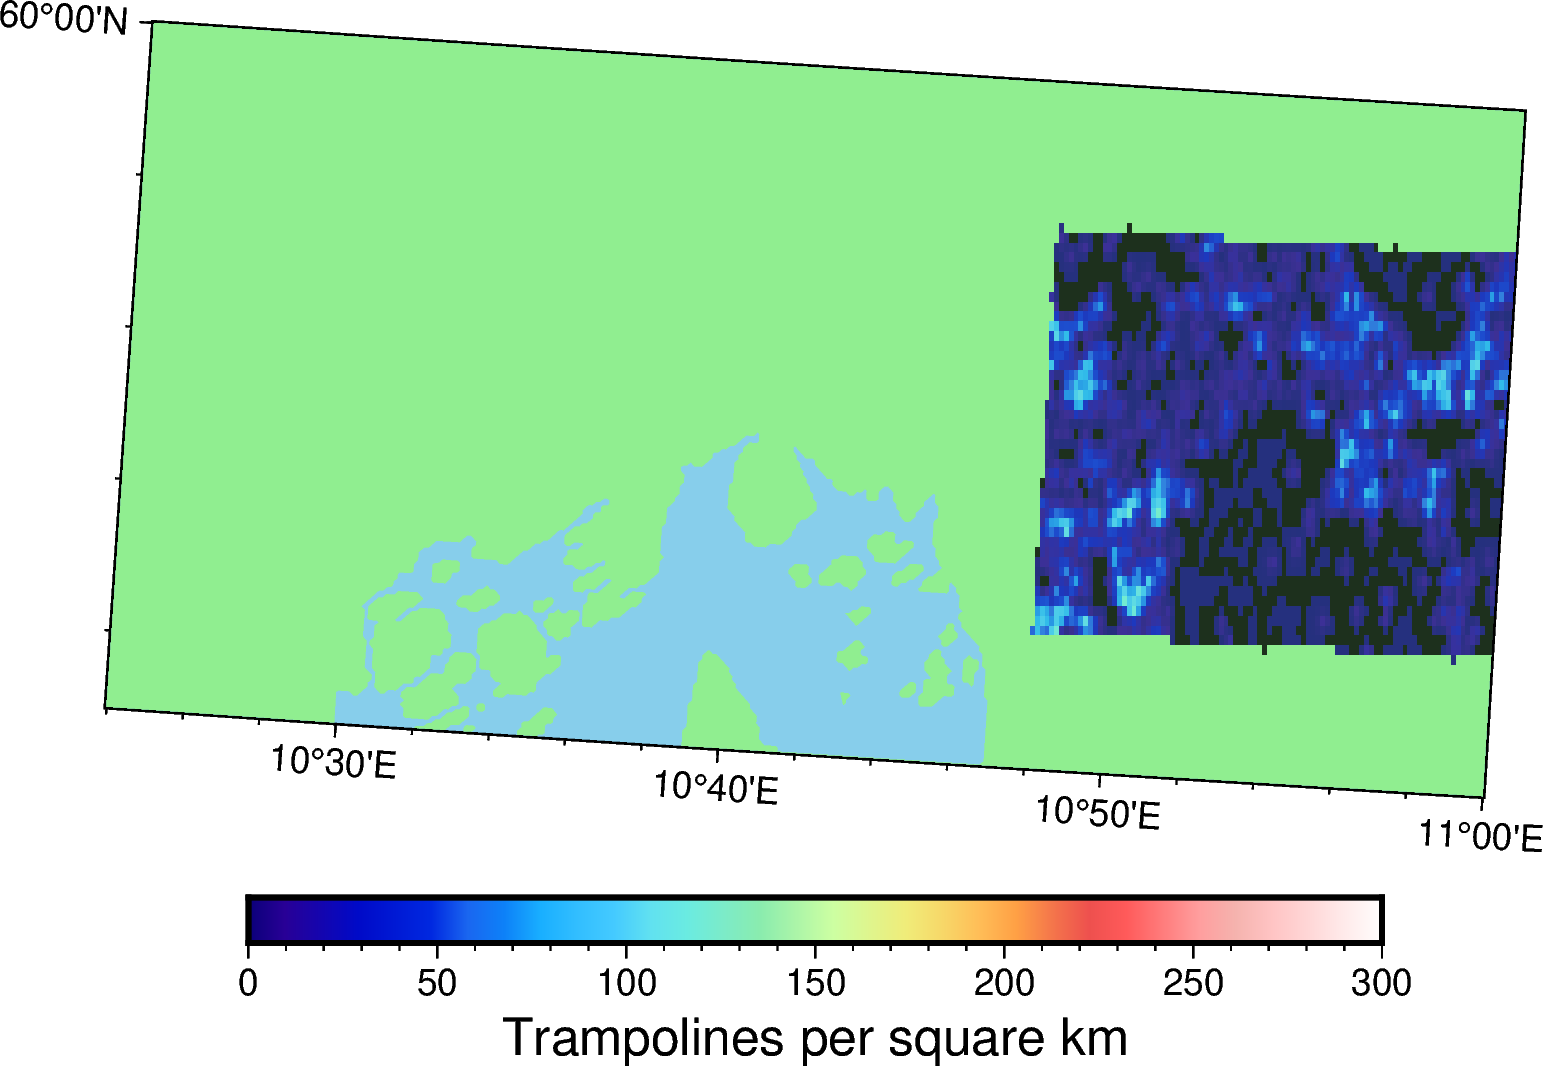

<Figure size 432x288 with 0 Axes>

In [417]:
local_region = [df['long'].min(), df['long'].max(), df['lat'].min(), df['lat'].max()]

trampoline_surface_east = pygmt.surface(data=df[['long', 'lat', 'trampolines per km2']], region=local_region, spacing=SPACING)

fig = pygmt.Figure()
fig.basemap(region=REGION_OSLO, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
pygmt.makecpt(cmap="haxby", series=[0, 300])
fig.grdimage(trampoline_surface_east, nan_transparent=True, transparency=20)
fig.colorbar(frame=["a50f10", 'x+l"Trampolines per square km"', "y"])
plt.tight_layout()
fig.show()
fig.savefig('./figures/trampoline_map_detection_Oslo_E.png', dpi=400)

### Central Oslo

18096
59.968406677246094
59.880001068115234
10.796974182128906
10.5
   number        lat       long  zoom
0       0  59.880001  10.500000    19
1       1  59.880001  10.501717    19
2       2  59.880001  10.503433    19
3       3  59.880001  10.505150    19
4       4  59.880001  10.506866    19


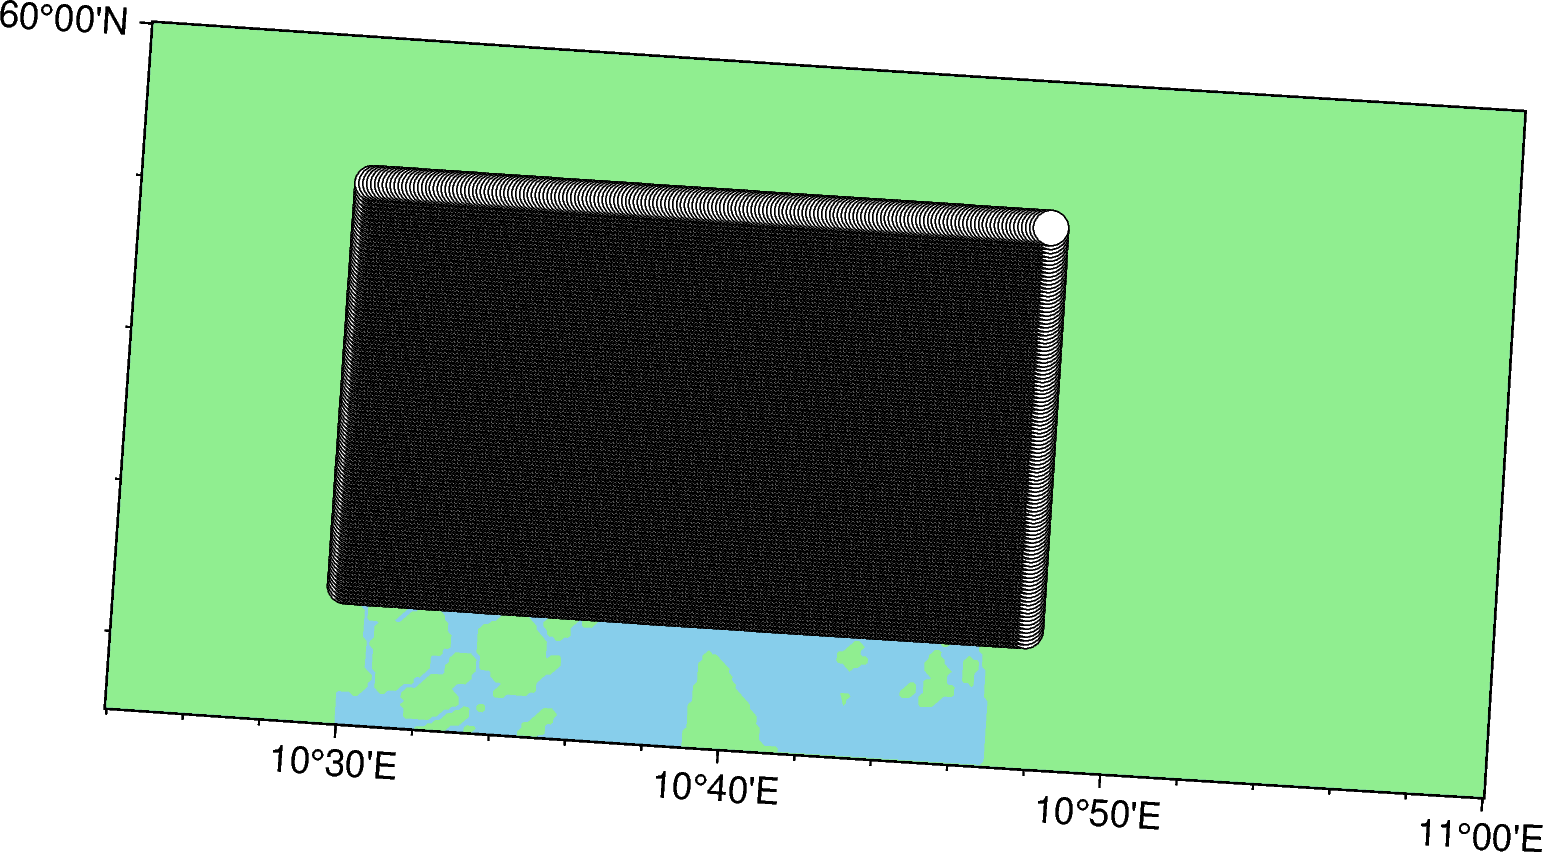

In [418]:
# load image coordinates
folder_path = Path('./images/data_2022-02-13_Oslo_Center')

df = pd.read_csv(folder_path / 'images.txt',  names=["number", "lat", "long", "zoom"])
print(len(df))

print(df.lat.max())
print(df.lat.min())
print(df.long.max())
print(df.long.min())

region = [
    df.long.min() - 0.1,
    df.long.max() + 0.011,
    df.lat.min() - 0.05,
    df.lat.max() + 0.01,
]

print(df.head())

# plot locations of images
fig = pygmt.Figure()
fig.basemap(region=REGION_OSLO, projection=PROJECTION, frame=True)
fig.coast(land="lightgreen", water="skyblue")
fig.plot(x=df.long, y=df.lat, style="c0.3c", color="white", pen="black")
fig.show()
fig.savefig('./figures/map.png', dpi=400)

# get the labels
labels_path = Path(r"C:\Users\lug\Documents\Code\trampolines\yolov5\runs\detect\exp10\labels")

text_files = [f for f in os.listdir(labels_path) if f.endswith('gmaps.txt')]
print(text_files[:5])

columns = ['Number', 'X', 'Y', 'Width', "Height", 'Filepath']
df = pd.DataFrame(columns = columns)

for tf in text_files:
    df_new = pd.read_csv(labels_path / tf, sep=' ', names=['Number', 'X', 'Y', 'Width', "Height"])
    df_new['Filepath'] = tf
    df = pd.concat([df, df_new])

print(df.head())
print(f"Data for {df.Filepath.nunique()} images containing a trampoline")

# get number of trampolines (number of times filepath appears in df)
df_counts = pd.DataFrame(df['Filepath'].value_counts().reset_index())
df_counts.columns = ['Filepath', 'trampoline count']

# Get coords of each image because this data isn't un the detect folder labels
image_data_filepath = folder_path / "images.txt"

df_coords = pd.read_csv(image_data_filepath,  names=["number", "lat", "long", "zoom"])

df_coords['Filepath'] = df_coords['number'].astype(str) + "_gmaps.txt"

print(f"Coordinates data for {len(df_coords)} images")

# merge coordinate and trampoline number dataframes
df = pd.merge(df_coords, df_counts, on='Filepath', how='outer').fillna(0)

# calculate number of trampolines per m2 (see coordinates_calculation.ipynb for calculation of image size in m)
m_per_image_zoom_19 = 187.77
m2_per_image_zoom_19 = m_per_image_zoom_19**2
km2_per_image_zoom_19 = m2_per_image_zoom_19 / 1e6
df['trampolines per km2'] = df['trampoline count'] / km2_per_image_zoom_19

print(f"Maximum number of trampolines per km2 = {df['trampolines per km2'].max()}")

# save to csv
df.to_csv('./output/Oslo_Center.csv')

print(f"Trampoline counts data for {len(df)} images")

# Make and plot the surface showing heatmap of trampoline locations
local_region = [df['long'].min(), df['long'].max(), df['lat'].min(), df['lat'].max()]

trampoline_surface_center = pygmt.surface(data=df[['long', 'lat', 'trampolines per km2']], region=local_region, spacing=SPACING)

fig = pygmt.Figure()
fig.basemap(region=REGION_OSLO, projection="U33R/12c", frame=True)
fig.coast(land="lightgreen", water="skyblue")
pygmt.makecpt(cmap="haxby", series=[0, 300])
fig.grdimage(trampoline_surface_center, nan_transparent=True, transparency=60)
fig.grdimage(trampoline_surface_east, nan_transparent=True, transparency=60)
fig.colorbar(frame=["a50f10", 'x+l"Trampolines per square km"', "y"])
plt.tight_layout()
fig.show()
fig.savefig('./figures/trampoline_map_detection_Oslo_Center.png', dpi=400)